In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [8]:
# Add path to module
import sys
sys.path.append('M:/Code/Lifetmm')
import lifetmm
from lifetmm.Methods.SpontaneousEmissionRate import LifetimeTmm

<IPython.core.display.Javascript object>


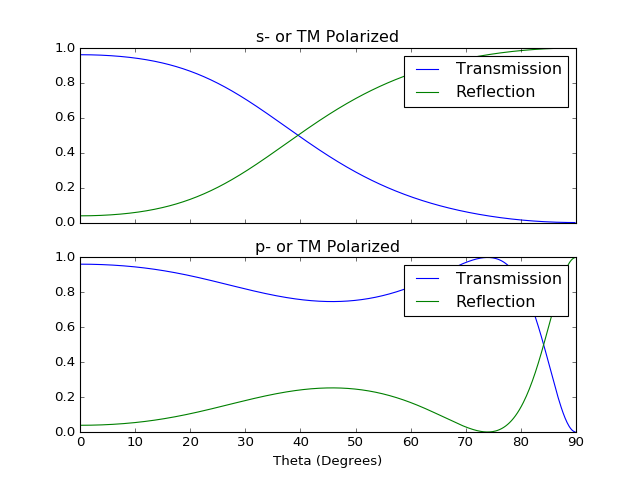

100%|█████████████████████████████████████| 500/500 [00:00<00:00, 10638.26it/s]


In [9]:
# Create structure
st = LifetimeTmm()
# Set vacuum wavelength
lam0 = 1550
st.set_wavelength(lam0)
st.set_field('E')
air = 1
sio2 = 3.48
st.add_layer(0 * lam0, air)
st.add_layer(1 * lam0, sio2)
st.add_layer(0 * lam0, air)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex='col', sharey='col')
for pol in ['s', 'p']:
    st.set_polarization(pol)
    th_list = np.array([])
    R_list = np.array([])
    T_list = np.array([])
    for th in tqdm(np.linspace(0, 90, num=500, endpoint=False)):
        st.set_angle(th, units='degrees')
        th_list = np.append(th_list, th)
        R, T = st.calc_R_and_T(correction=True)
        R_list = np.append(R_list, R)
        T_list = np.append(T_list, T)
    if pol == 's':
        ax1.plot(th_list, T_list, label='Transmission')
        ax1.plot(th_list, R_list, label='Reflection')
        ax1.set_title('s- or TM Polarized')
    else:
        ax2.plot(th_list, T_list, label='Transmission')
        ax2.plot(th_list, R_list, label='Reflection')
        ax2.set_title('p- or TM Polarized')

ax1.set_ylim([0,1])
ax2.set_xlabel('Theta (Degrees)')
ax1.legend()
ax2.legend()
plt.show()